<h1>Bài 6 _ Thực hành

<h4>(Lập trình) Sử dụng thuật toán k-Means để giảm số màu trong ảnh từ đó giảm kích thước file ảnh theo ý muốn. Sinh viên thực hiện theo hướng dẫn sau:

<H3>Import các thư viện cần thiết

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
%matplotlib inline

<h3>Đọc vào file ảnh cần giảm kích thước và hiển thị ra màn hình

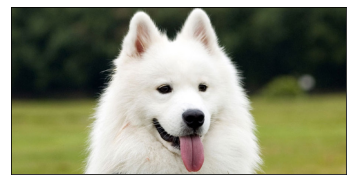

In [2]:
image = Image.open("E:\\IS252\\Lab5\\data\\dog.png")
axes = plt.axes(xticks=[],yticks=[])
axes.imshow(image)

<h3>Chuyển ảnh đọc được thành mảng số và lấy thông tin chiều rộng, cao của ảnh

In [3]:
imarr =np.array(image)
rows = imarr.shape[0]
cols = imarr.shape[1]

<h3>Biến đổi các giá trị màu từ đoạn [0…255] về đoạn [0…1] và chuyển dạng mảng từ 3 chiều (cao, rộng, sâu) thành 2 chiều (cao x rộng, sâu).

In [4]:
data = imarr
data = data.reshape(rows*cols,3)
data.shape

(405000, 3)

<h3>Chạy thuật toán gom cụm với số màu mong muốn là 32. Tiếp theo đó, lấy ra mảng biểu diễn hình sau khi đã gom cụm.

In [5]:
kmeans = KMeans(n_clusters = 32, max_iter =300)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

<h3>Khôi phục dạng mảng vừa thu được từ 2 chiều thành 3 chiều như ban đầu

In [6]:
img_recolored = new_colors.reshape(imarr.shape)

<h3>Biểu diễn hình kết quả và so sánh với ảnh gốc ban đầu

Text(0.5, 1.0, 'Hình 32-color')

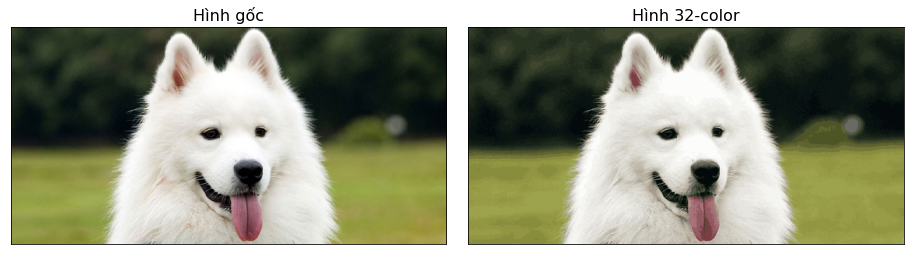

In [7]:
fig,ax = plt.subplots(1,2,figsize=(16,6),subplot_kw = dict(xticks =[],yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(image)
ax[0].set_title("Hình gốc",size=16)

ax[1].imshow(np.uint8(img_recolored))
ax[1].set_title("Hình 32-color",size=16)

<h3>Lưu hình kết quả xuống đĩa cứng

In [9]:
img_recolored = img_recolored*255
new_img = Image.fromarray(img_recolored.astype(np.uint8))
new_img.save('./data/dog_new2.png')